In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.svm import SVC
import time
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, SimpleRNN, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

In [2]:
file_path =r"D:\software_testing\Modified_SQL_Dataset.csv"
df = pd.read_csv(file_path)
df.head()

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [3]:
print(len(df[df.Label==0]))
print(len(df[df.Label==1]))

19537
11382


In [4]:
df_label0=df[df.Label==0]
df_label1=df[df.Label==1]

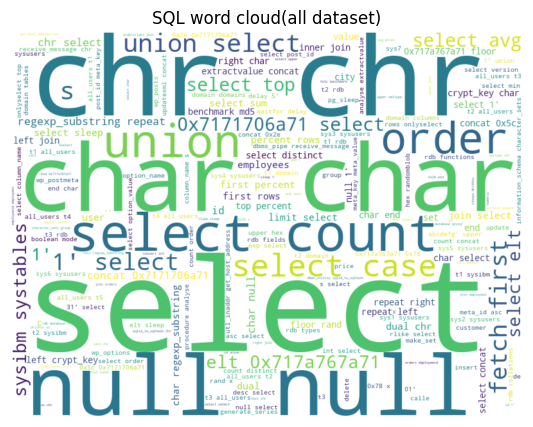

In [5]:
SQL_text = ' '.join(df['Query'].str.lower())
SQL_wordcloud = WordCloud(width=800, height=600, background_color='white').generate(SQL_text)

plt.figure(figsize=(10, 5))
plt.imshow(SQL_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('SQL word cloud(all dataset)')
plt.show()

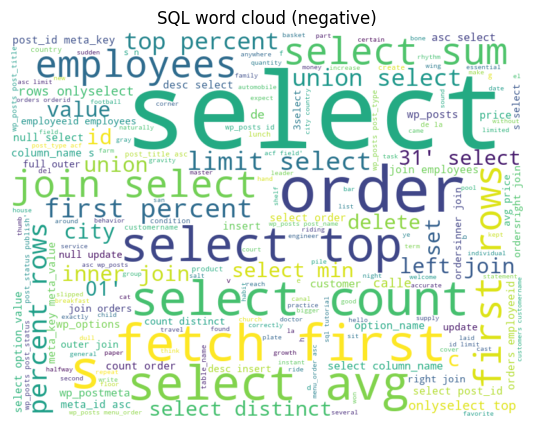

In [6]:
SQL_text0 = ' '.join(df_label0['Query'].str.lower())
SQL_wordcloud0 = WordCloud(width=800, height=600, background_color='white').generate(SQL_text0)

plt.figure(figsize=(10, 5))
plt.imshow(SQL_wordcloud0, interpolation='bilinear')
plt.axis('off')
plt.title('SQL word cloud (negative)')
plt.show()

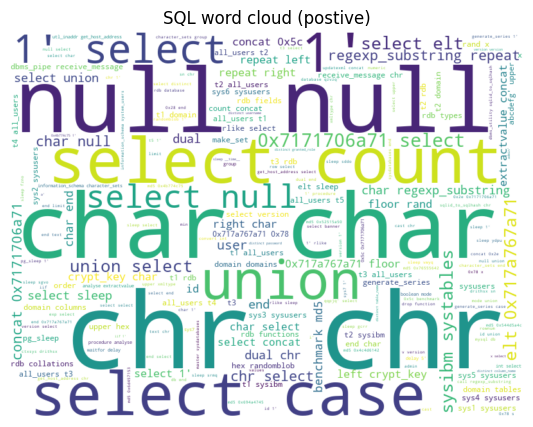

In [7]:
SQL_text1 = ' '.join(df_label1['Query'].str.lower())
SQL_wordcloud1 = WordCloud(width=800, height=600, background_color='white').generate(SQL_text1)

plt.figure(figsize=(10, 5))
plt.imshow(SQL_wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.title('SQL word cloud (postive)')
plt.show()

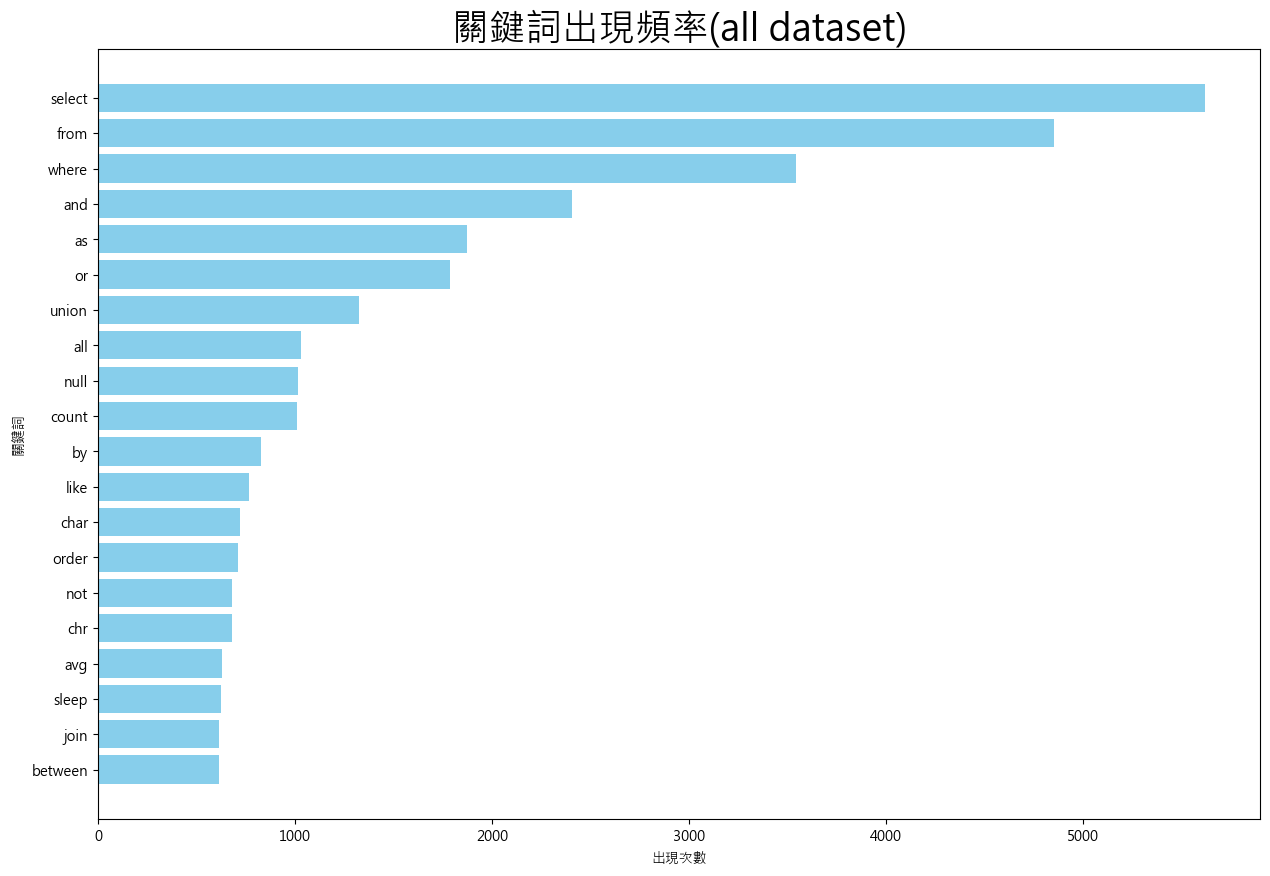

In [8]:
vectorizer = TfidfVectorizer(max_features=50)
X = vectorizer.fit_transform(df['Query'])

keywords = vectorizer.get_feature_names_out()
word_count = np.sum(X.toarray(), axis=0)
keyword_df = pd.DataFrame({'keyword': keywords, 'count': word_count})
keyword_df = keyword_df.sort_values(by='count', ascending=False)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei']
plt.figure(figsize=(15, 10))
plt.barh(keyword_df['keyword'][0:20], keyword_df['count'][0:20], color='skyblue')
plt.rcParams.update({'font.size': 22})
plt.xlabel('出現次數')
plt.ylabel('關鍵詞')
plt.title('關鍵詞出現頻率(all dataset)')
plt.gca().invert_yaxis()
plt.show()

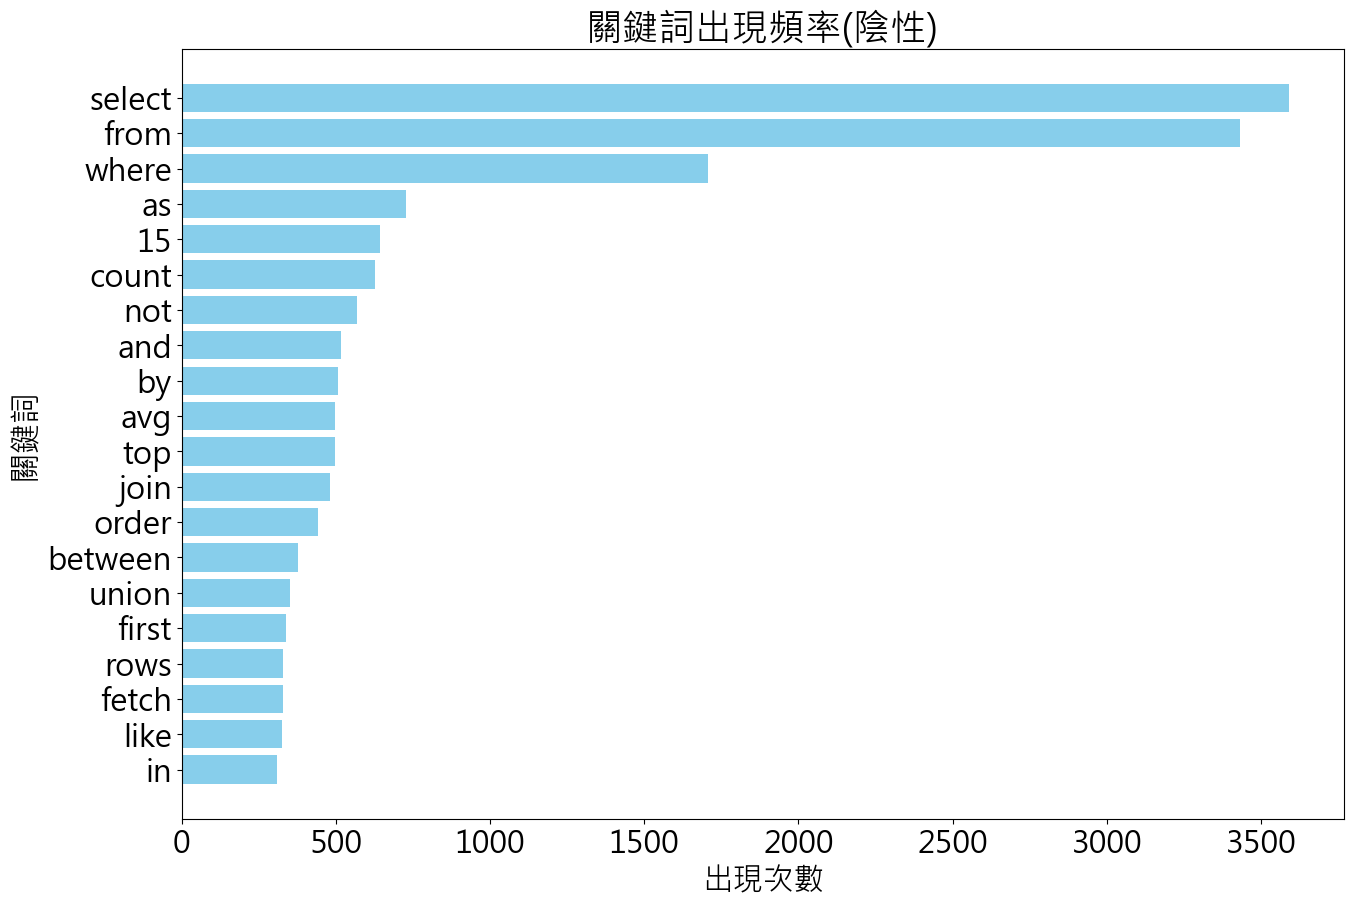

In [9]:
vectorizer = TfidfVectorizer(max_features=50)
X = vectorizer.fit_transform(df_label0['Query'])

keywords = vectorizer.get_feature_names_out()
word_count = np.sum(X.toarray(), axis=0)
keyword_df = pd.DataFrame({'keyword': keywords, 'count': word_count})
keyword_df = keyword_df.sort_values(by='count', ascending=False)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei']
plt.figure(figsize=(15, 10))
plt.barh(keyword_df['keyword'][0:20], keyword_df['count'][0:20], color='skyblue')
plt.rcParams.update({'font.size': 22})
plt.xlabel('出現次數')
plt.ylabel('關鍵詞')
plt.title('關鍵詞出現頻率(陰性)')
plt.gca().invert_yaxis()
plt.show()

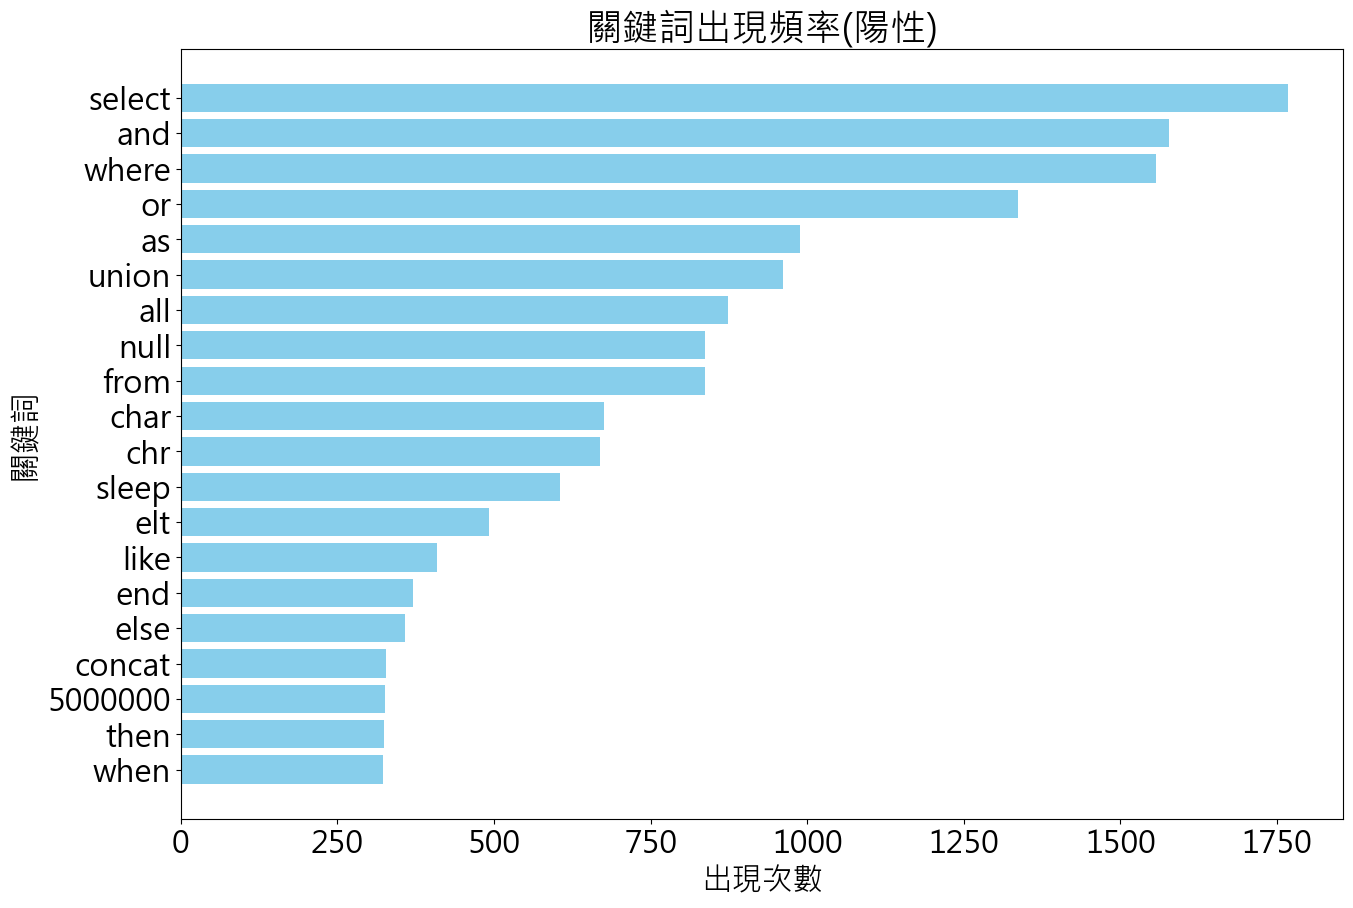

In [10]:
vectorizer = TfidfVectorizer(max_features=50)
X = vectorizer.fit_transform(df_label1['Query'])

keywords = vectorizer.get_feature_names_out()
word_count = np.sum(X.toarray(), axis=0)
keyword_df = pd.DataFrame({'keyword': keywords, 'count': word_count})
keyword_df = keyword_df.sort_values(by='count', ascending=False)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei']
plt.figure(figsize=(15, 10))
plt.barh(keyword_df['keyword'][0:20], keyword_df['count'][0:20], color='skyblue')
plt.rcParams.update({'font.size': 22})
plt.xlabel('出現次數')
plt.ylabel('關鍵詞')
plt.title('關鍵詞出現頻率(陽性)')
plt.gca().invert_yaxis()
plt.show()

In [11]:
#文本向量化
vectorizer = CountVectorizer(token_pattern=r"\b[a-zA-Z0-9@'=._()<>|\\/*\-]+\b",ngram_range=(1,10),lowercase=False)
X = vectorizer.fit_transform(df['Query'])
y = df['Label']
# 分割數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

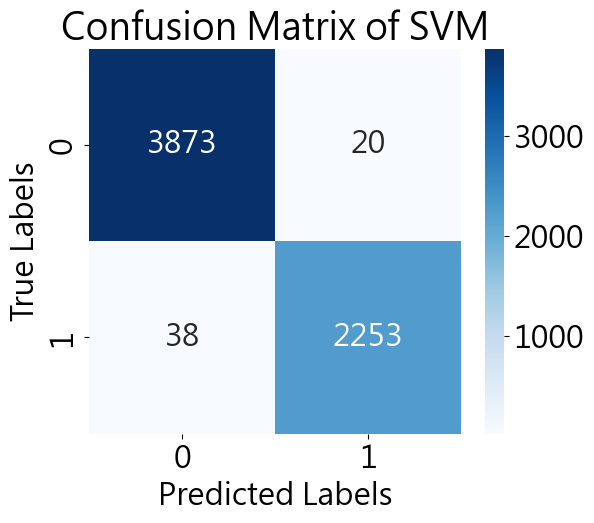

執行時間：70.083835 秒
準確度: 99.06%
召回率: 98.34%
精確度: 99.12%
F1-score: 98.73%
特異性: 99.49%
敏感度: 98.34%


In [12]:
start=time.time()
clf = SVC(kernel='rbf', random_state=42)

# 訓練模型
clf.fit(X_train, y_train)

# 預測
y_pred = clf.predict(X_test)
end=time.time()

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of SVM')
plt.show()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("執行時間：%f 秒" % (end - start))
print("準確度: {:.2f}%".format(accuracy * 100))
print("召回率: {:.2f}%".format(recall * 100))
print("精確度: {:.2f}%".format(precision * 100))
print("F1-score: {:.2f}%".format(f1 * 100))
print("特異性: {:.2f}%".format(tn / (tn + fp) * 100))
print("敏感度: {:.2f}%".format(tp / (tp + fn) * 100))

In [13]:
# 使用TF-IDF文本向量化
tfidf=TfidfVectorizer(token_pattern=r"\b[a-zA-Z0-9@'=._()<>|\\/*\-]+\b",ngram_range=(1,10),lowercase=False)
X2 = tfidf.fit_transform(df['Query'])
y2 = df['Label']

# 分割數據集為訓練集和測試集
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42,shuffle=True)

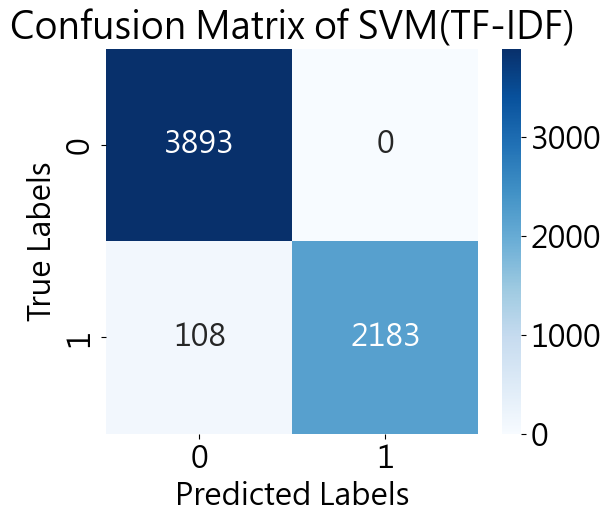

執行時間：165.293788 秒
準確度: 98.25%
召回率: 95.29%
精確度: 100.00%
F1-score: 97.59%
特異性: 100.00%
敏感度: 95.29%


In [14]:
start2=time.time()
clf2 = SVC(kernel='rbf', random_state=42)

# 訓練模型
clf2.fit(X_train2, y_train2)

# 預測預測
y_pred2 = clf2.predict(X_test2)
end2=time.time()

# 評估模型
accuracy = accuracy_score(y_test2, y_pred2)
recall = recall_score(y_test2, y_pred2)
precision = precision_score(y_test2, y_pred2)
f1 = f1_score(y_test2, y_pred2)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test2, y_pred2), annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of SVM(TF-IDF)')
plt.show()
tn, fp, fn, tp = confusion_matrix(y_test2, y_pred2).ravel()

print("執行時間：%f 秒" % (end2 - start2))
print("準確度: {:.2f}%".format(accuracy * 100))
print("召回率: {:.2f}%".format(recall * 100))
print("精確度: {:.2f}%".format(precision * 100))
print("F1-score: {:.2f}%".format(f1 * 100))
print("特異性: {:.2f}%".format(tn / (tn + fp) * 100))
print("敏感度: {:.2f}%".format(tp / (tp + fn) * 100))

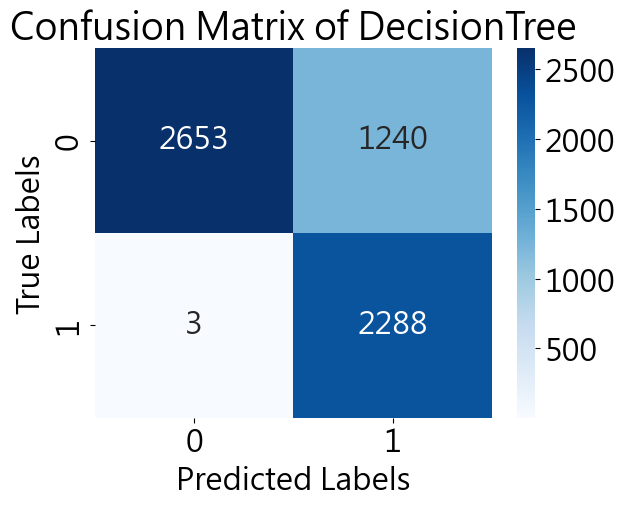

執行時間：81.593216 秒
準確度: 79.90%
召回率: 99.87%
精確度: 64.85%
F1-score: 78.64%
特異性: 68.15%
敏感度: 99.87%


In [15]:
start3=time.time()
clf3 = DecisionTreeClassifier(random_state=42)

# 訓練模型
clf3.fit(X_train, y_train)

# 預測
y_pred3 = clf3.predict(X_test)
end3=time.time()

# 評估模型
accuracy = accuracy_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of DecisionTree')
plt.show()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred3).ravel()

print("執行時間：%f 秒" % (end3 - start3))
print("準確度: {:.2f}%".format(accuracy * 100))
print("召回率: {:.2f}%".format(recall * 100))
print("精確度: {:.2f}%".format(precision * 100))
print("F1-score: {:.2f}%".format(f1 * 100))
print("特異性: {:.2f}%".format(tn / (tn + fp) * 100))
print("敏感度: {:.2f}%".format(tp / (tp + fn) * 100))

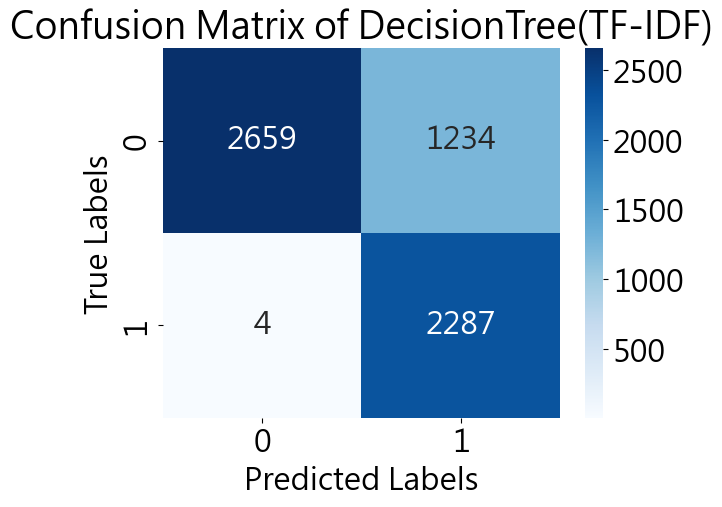

執行時間：308.307394 秒
準確度: 79.98%
召回率: 99.83%
精確度: 64.95%
F1-score: 78.70%
特異性: 68.30%
敏感度: 99.83%


In [16]:
start4=time.time()
clf4 = DecisionTreeClassifier(random_state=42)

# 訓練模型
clf4.fit(X_train2, y_train2)

# 預測
y_pred4 = clf4.predict(X_test2)
end4=time.time()

# 評估模型
accuracy = accuracy_score(y_test2, y_pred4)
recall = recall_score(y_test2, y_pred4)
precision = precision_score(y_test2, y_pred4)
f1 = f1_score(y_test2, y_pred4)
sns.heatmap(confusion_matrix(y_test2, y_pred4), annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of DecisionTree(TF-IDF)')
plt.show()
tn, fp, fn, tp = confusion_matrix(y_test2, y_pred4).ravel()

print("執行時間：%f 秒" % (end4 - start4))
print("準確度: {:.2f}%".format(accuracy * 100))
print("召回率: {:.2f}%".format(recall * 100))
print("精確度: {:.2f}%".format(precision * 100))
print("F1-score: {:.2f}%".format(f1 * 100))
print("特異性: {:.2f}%".format(tn / (tn + fp) * 100))
print("敏感度: {:.2f}%".format(tp / (tp + fn) * 100))

In [17]:
# 文本向量化
tokenizer = Tokenizer(num_words=6000)
tokenizer.fit_on_texts(df['Query'])
sequences = tokenizer.texts_to_sequences(df['Query'])
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 28719 unique tokens.


In [18]:
# 填充序列，使其具有相同的長度
max_sequence_length = 50
data = pad_sequences(sequences, maxlen=max_sequence_length)

In [19]:
# 分割數據集為訓練集和測試集
x_train, x_test, y_train, y_test = train_test_split(data, np.array(df['Label']), test_size=0.1, random_state=42,shuffle=True)
x_train,x_val,y_train,y_val= train_test_split(x_train, y_train, test_size=0.222, random_state=42,shuffle=True)

In [20]:
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add((SimpleRNN(256,dropout=0.5,return_sequences=True)))
model.add((SimpleRNN(128,dropout=0.5,return_sequences=True)))
model.add((SimpleRNN(64,dropout=0.5)))
model.add(Dense(2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 100)           2872000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 50, 256)           91392     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 50, 128)           49280     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 64)                12352     
_________________________________________________________________
dense (Dense)                (None, 2)                 130       
Total params: 3,025,154
Trainable params: 3,025,154
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
# 使用EarlyStopping回調來防止過擬合
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# 訓練模型
epochs = 60  # 增加訓練次數
batch_size = 64
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=2, callbacks=[early_stopping])

Epoch 1/60
339/339 - 120s - loss: 0.3070 - accuracy: 0.8433 - val_loss: 0.0442 - val_accuracy: 0.9903
Epoch 2/60
339/339 - 41s - loss: 0.0432 - accuracy: 0.9891 - val_loss: 0.0289 - val_accuracy: 0.9924
Epoch 3/60
339/339 - 40s - loss: 0.0274 - accuracy: 0.9942 - val_loss: 0.0362 - val_accuracy: 0.9922
Epoch 4/60
339/339 - 39s - loss: 0.0469 - accuracy: 0.9873 - val_loss: 0.0348 - val_accuracy: 0.9919
Epoch 5/60
339/339 - 40s - loss: 0.0235 - accuracy: 0.9951 - val_loss: 0.0332 - val_accuracy: 0.9930


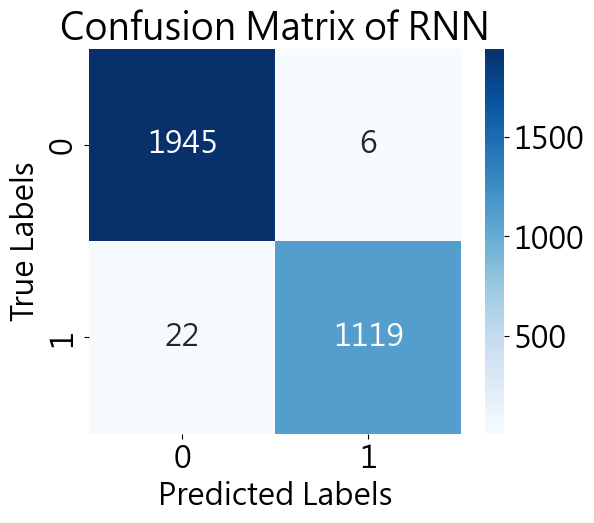

準確度: 99.09%
召回率: 98.07%
精確度: 99.47%
F1-score: 98.76%
特異性: 99.69%
敏感度: 98.07%


In [22]:
# 預測
y_pred_rnn_prob = model.predict(x_test)
y_pred_rnn = (y_pred_rnn_prob > 0.5).astype(int)
y_pred_rnn = y_pred_rnn.argmax(axis=1)

# 評估模型
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rnn).ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = 2 * (precision * recall) / (precision + recall)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rnn), annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of RNN')
plt.show()

print("準確度: {:.2f}%".format(accuracy * 100))
print("召回率: {:.2f}%".format(recall * 100))
print("精確度: {:.2f}%".format(precision * 100))
print("F1-score: {:.2f}%".format(f1 * 100))
print("特異性: {:.2f}%".format(tn / (tn + fp) * 100))
print("敏感度: {:.2f}%".format(tp / (tp + fn) * 100))

In [23]:
%matplotlib inline
def show_train_history(train_history,train,title,validation,ytitle):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title(title)
    plt.ylabel(ytitle)
    plt.xlabel('epoch')
    plt.legend(['train','validation'])
    plt.show()

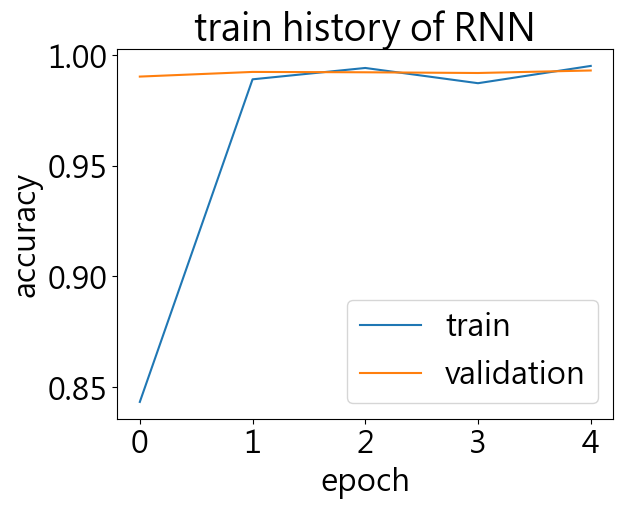

In [24]:
show_train_history(history,'accuracy','train history of RNN','val_accuracy','accuracy')

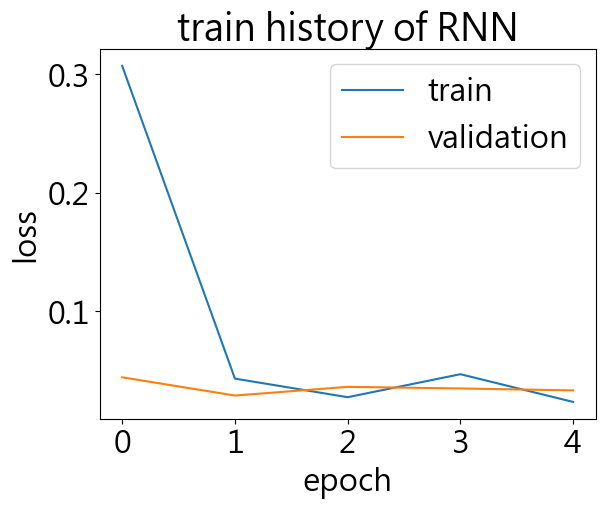

In [25]:
show_train_history(history,'loss','train history of RNN','val_loss','loss')

In [26]:
model2 = Sequential()
model2.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=max_sequence_length))
model2.add((GRU(256,dropout=0.5,return_sequences=True)))
model2.add((GRU(128,dropout=0.5,return_sequences=True)))
model2.add((GRU(64,dropout=0.5)))
model2.add(Dense(2,activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 100)           2872000   
_________________________________________________________________
gru (GRU)                    (None, 50, 256)           274944    
_________________________________________________________________
gru_1 (GRU)                  (None, 50, 128)           148224    
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                37248     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 3,332,546
Trainable params: 3,332,546
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
# 使用EarlyStopping回調來防止過擬合
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# 訓練模型
epochs = 60  # 增加訓練次數
batch_size = 64
history2 = model2.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=2, callbacks=[early_stopping])

Epoch 1/60
339/339 - 7s - loss: 0.0778 - accuracy: 0.9712 - val_loss: 0.0238 - val_accuracy: 0.9945
Epoch 2/60
339/339 - 4s - loss: 0.0210 - accuracy: 0.9951 - val_loss: 0.0221 - val_accuracy: 0.9948
Epoch 3/60
339/339 - 4s - loss: 0.0166 - accuracy: 0.9960 - val_loss: 0.0289 - val_accuracy: 0.9913
Epoch 4/60
339/339 - 4s - loss: 0.0171 - accuracy: 0.9959 - val_loss: 0.0284 - val_accuracy: 0.9932
Epoch 5/60
339/339 - 4s - loss: 0.0149 - accuracy: 0.9968 - val_loss: 0.0348 - val_accuracy: 0.9898


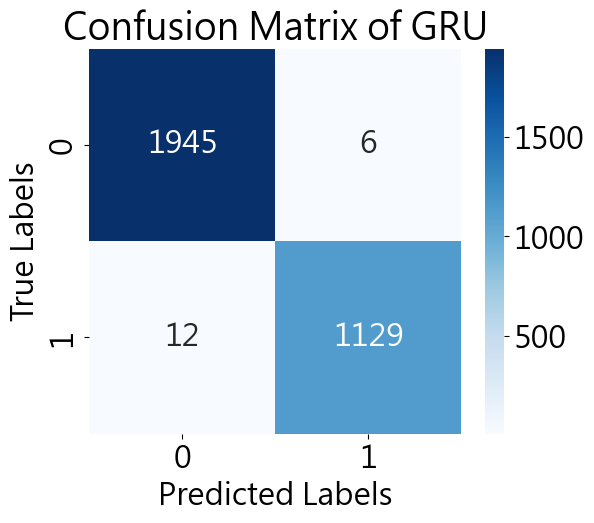

準確度: 99.42%
召回率: 98.95%
精確度: 99.47%
F1-score: 99.21%
特異性: 99.69%
敏感度: 98.95%


In [28]:
# 預測
y_pred_GRU_prob = model2.predict(x_test)
y_pred_GRU = (y_pred_GRU_prob > 0.5).astype(int)
y_pred_GRU = y_pred_GRU.argmax(axis=1)

# 評估模型
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_GRU).ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = 2 * (precision * recall) / (precision + recall)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_GRU), annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of GRU')
plt.show()

print("準確度: {:.2f}%".format(accuracy * 100))
print("召回率: {:.2f}%".format(recall * 100))
print("精確度: {:.2f}%".format(precision * 100))
print("F1-score: {:.2f}%".format(f1 * 100))
print("特異性: {:.2f}%".format(tn / (tn + fp) * 100))
print("敏感度: {:.2f}%".format(tp / (tp + fn) * 100))

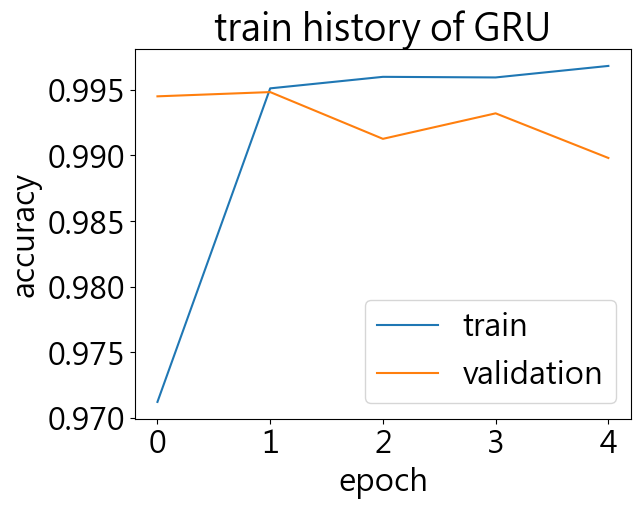

In [29]:
show_train_history(history2,'accuracy','train history of GRU','val_accuracy','accuracy')

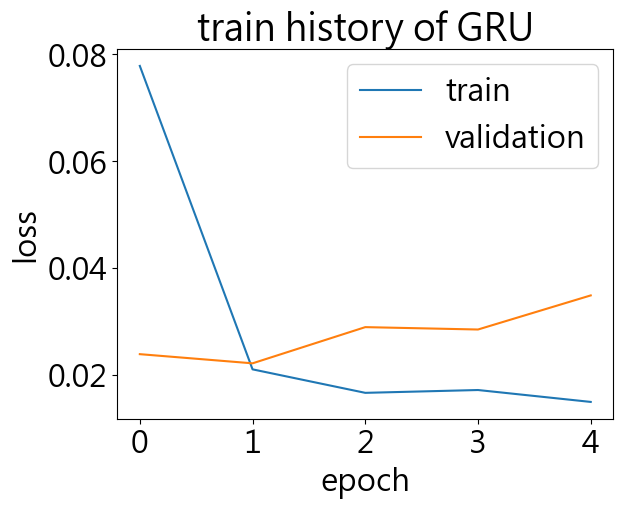

In [30]:
show_train_history(history2,'loss','train history of GRU','val_loss','loss')